# <center><div class="alert alert-info">House Grade Prediction</div>
<center> By - Jitendra Girish Patil

## House Grade Classification

Property buyers have different requirements. To facilitate this, real estate companies prefer categorizing various houses  into different grades based on various parameters. This would help agents in identifying the type of house a customer is  looking for. This way, the search for the house can be narrowed down by focusing only on the ‘condition of the house’. 

The Grade (condition of the house that ranges from A (Best) — E (Worst) ) can also be used by existing owners to list their properties for sale. Grading helps them in arriving at a price of the house.

To get the better results for store owners, building a model to predict the sales in store is necessary and this project is all about prediction of sales.


### <center><div class="alert alert-info">IMPORTING LIBRARIES</div>

In [1]:
import numpy as np                       # for numerical operation
import pandas as pd                      # for dataset handling
import matplotlib.pyplot as plt          # for data visualization
import seaborn as sb                     # for making statistical graphs
import warnings
warnings.filterwarnings('ignore')        # for warnings
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold   # for splitting the data
from sklearn import preprocessing                      # for data preprocessing functions
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder      # for scaling and label encoding
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score       # for accuracy calculation or evaluation
from sklearn.metrics import recall_score,f1_score,roc_auc_score,roc_curve         # for accuracy calculation or evaluation

### <center><div class="alert alert-info">DATA EXPLORATION</div>

### Importing Dataset

In [2]:
df = pd.read_csv('DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')
df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


### Checking Shape and Structure

In [3]:
# checking shape
df.shape

(3000, 14)

In [4]:
# checking size
df.size

42000

In [5]:
# chekcing dtypes
df.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

### Checking information and description

In [6]:
# checking description
df.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [7]:
# checking information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


### <center><div class="alert alert-info">DATA VISUALISATION</div>

Text(0.5, 1.0, 'Grade')

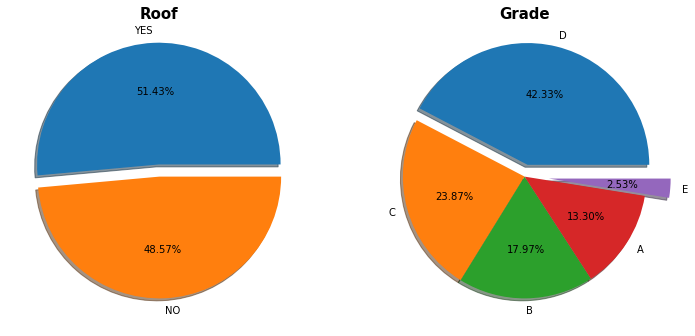

In [8]:
plt.subplots(1,2,figsize=(12,10))

plt.subplot(121)
explode = [0.1,0]
perc = df['roof'].value_counts()
lab = list(df['roof'].value_counts().index)
plt.pie(perc,labels = lab, autopct= "%0.2f%%", explode = explode, shadow=True)
plt.title('Roof', size=15, fontweight='bold')

plt.subplot(122)
explode = [0.1,0,0,0,0.2]
perc = df['Grade'].value_counts()
lab = list(df['Grade'].value_counts().index)
plt.pie(perc,labels = lab, autopct= "%0.2f%%", explode=explode, shadow=True)
plt.title('Grade', size=15, fontweight='bold')

### <div class="alert alert-success">Interpretation</div>
     - There are 51.43% of houses which have roof and 48.57% dont have roof of their house.
     - In D grade 42.33% have maximum percentage of share in houses and E have the least 2.53%.

<AxesSubplot:title={'center':'Total Area'}, xlabel='Total Area', ylabel='Count'>

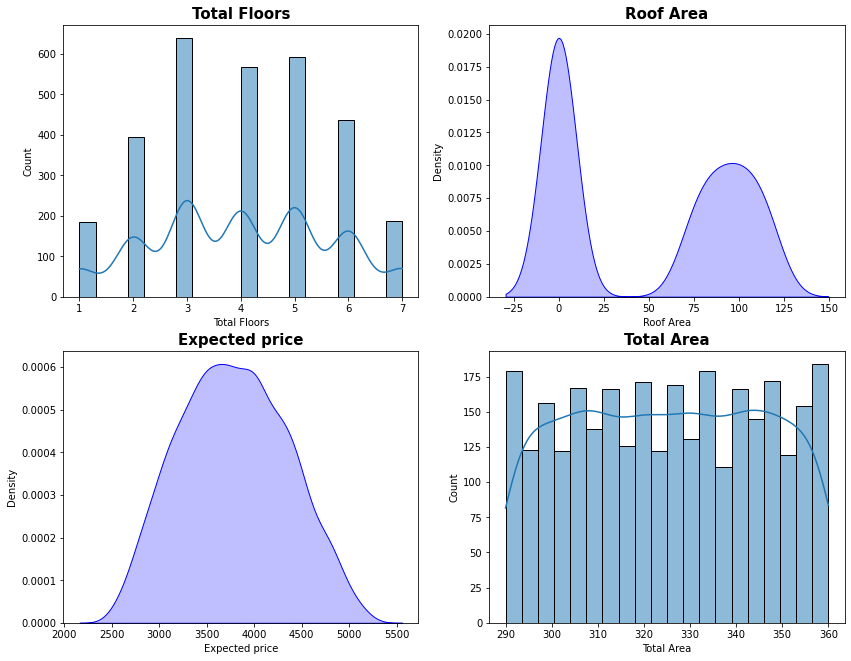

In [9]:
plt.subplots(2,2,figsize=(14,11))

plt.subplot(221)
plt.title('Total Floors', size=15, fontweight='bold')
plt.xlabel('Total Floors')
sb.histplot(df['Nfloors'], bins=20, kde=True)

plt.subplot(222)
plt.title('Roof Area', size=15, fontweight='bold')
plt.xlabel('Roof Area')
sb.kdeplot(df['Roof(Area)'], shade=True, color='blue')

plt.subplot(223)
plt.title('Expected price', size=15, fontweight='bold')
plt.xlabel('Expected price')
sb.kdeplot(df['Expected price'], shade=True, color='blue')

plt.subplot(224)
plt.title('Total Area', size=15, fontweight='bold')
plt.xlabel('Total Area')
sb.histplot(df['Area(total)'], bins=20, kde=True)

### <div class="alert alert-success">Interpretation</div>
    - In Total Floors Graph, There are 250 counts for 3 Floors, and least for 1 and 7 floors where the counts is ~80.
    - In Roof Area Graph, most of the area is 0 but apart from that most of the Roof area is 90.
    - In Expected Price Graph, the graph is almost normally distributed where the most expected price have 3500-4000.
    - In Total Area Graph, most of the total area is from 295 to 355 having count from 130-150.

<AxesSubplot:title={'center':'Total number of rooms'}, xlabel='Trooms', ylabel='count'>

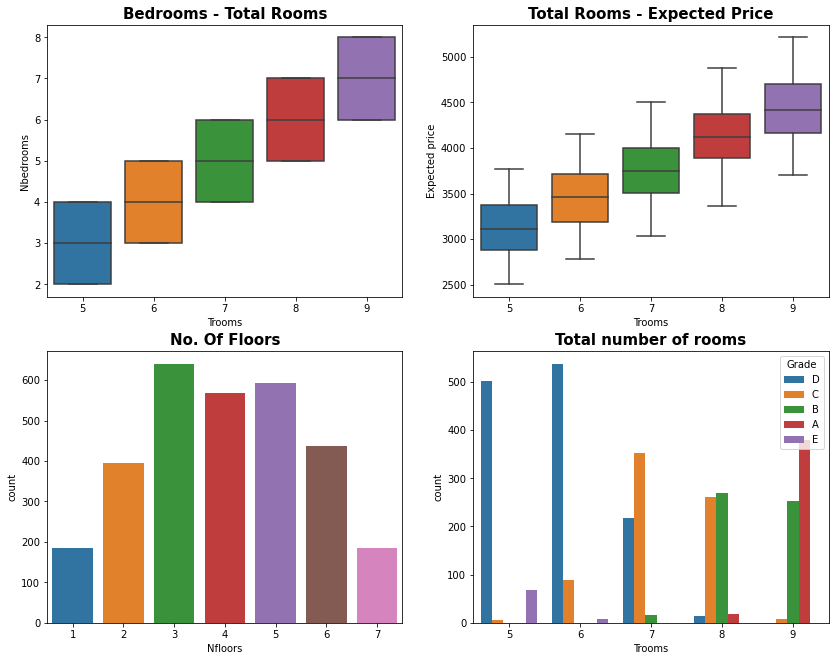

In [10]:
plt.subplots(2,2,figsize=(14,11))

plt.subplot(221)
plt.title('Bedrooms - Total Rooms', size=15, fontweight='bold')
plt.xlabel('Total Rooms')
plt.ylabel('Bedrooms')
sb.boxplot(y=df['Nbedrooms'],x=df['Trooms'])

plt.subplot(222)
plt.title('Total Rooms - Expected Price', size=15, fontweight='bold')
plt.xlabel('Total Rooms')
plt.ylabel('Expected Price')
sb.boxplot(y=df['Expected price'],x=df['Trooms'])

plt.subplot(223)
plt.title('No. Of Floors', size=15, fontweight='bold')
plt.xlabel('No. of Floors')
sb.countplot(x=df['Nfloors'])

plt.subplot(224)
plt.title('Total number of rooms', size=15, fontweight='bold')
plt.xlabel('No. of Rooms')
sb.countplot(x=df['Trooms'], hue=df['Grade'])

### <div class="alert alert-success">Interpretation</div> 
     - In Bedroom - Total Rooms graph :-
         - For 5 rooms there are 2-4 bedrooms.
         - For 6 rooms there are 3-5 bedrooms.
         - For 7 rooms there are 4-6 bedrooms.
         - For 8 rooms there are 5-7 bedrooms.
         - For 9 rooms there are 6-8 bedrooms.
     - In Total Rooms - Expected Price graph :-
         - For 5 rooms the price is 2900-3400.
         - For 6 rooms the price is 3200-3700.
         - For 7 rooms the price is 3500-4000.
         - For 8 rooms the price is 3900-4400.
         - For 9 rooms the price is 4200-4700.
     - In No. of Floors Graph, in 3 Floors there is more than 600 in counts and least in 1 and 7 floor with 190 counts.
     - In Total Number of rooms Graph, in 5 and 6 rooms, Grade D have the highest count, in 7 rooms Grade C have more counts, in 8 rooms Grade B have higher counts than others and in 9 rooms Grade A have higher counts than any other grade.

### <center><div class="alert alert-info">DATA PREPROCESSING</div>

### Checking Null Values

In [11]:
(df.isnull().sum()*100)/df.shape[0]

Id                0.0
Area(total)       0.0
Trooms            0.0
Nbedrooms         0.0
Nbwashrooms       0.0
Twashrooms        0.0
roof              0.0
Roof(Area)        0.0
Lawn(Area)        0.0
Nfloors           0.0
API               0.0
ANB               0.0
Expected price    0.0
Grade             0.0
dtype: float64

* As we can see there is no null values in the data

### Converting from non numeric to numeric dtypes

In [12]:
col = ['roof','Grade']
label_encoder = LabelEncoder()
for i in col:
    df[i] = df[i].astype('category')                   # converting non numeric to categorical
    df[i] = label_encoder.fit_transform(df[i])         # converting categorical to numeric dtype

In [13]:
# checking if all the non numeric type are converted into numeric type
df.dtypes

Id                int64
Area(total)       int64
Trooms            int64
Nbedrooms         int64
Nbwashrooms       int64
Twashrooms        int64
roof              int32
Roof(Area)        int64
Lawn(Area)        int64
Nfloors           int64
API               int64
ANB               int64
Expected price    int64
Grade             int32
dtype: object

### Scaling the data

In [14]:
a = df.drop(['Grade'],axis=1)     # we need the prediction of values in original data and not the scaled range

In [15]:
scaler = MinMaxScaler()                           # using MinMaxScaler for normalising the data into the range 0 and 1
df_scaled = pd.DataFrame(scaler.fit_transform(a.to_numpy()),columns=a.columns)  #fitting the scaler to all dtypes
df_scaled.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,0.000000,0.700000,0.25,0.500000,0.428571,0.500,0.0,0.000000,0.12,0.166667,0.650000,1.0,0.360251
1,0.000333,0.971429,0.00,0.333333,0.285714,0.250,1.0,0.591667,0.52,0.333333,0.533333,0.6,0.370944
2,0.000667,0.485714,0.50,0.500000,0.428571,0.375,1.0,0.841667,0.94,0.666667,0.400000,0.4,0.458702
3,0.001000,0.571429,0.25,0.333333,0.285714,0.375,1.0,0.841667,0.24,0.166667,0.316667,0.2,0.232301
4,0.001334,0.428571,0.50,0.333333,0.428571,0.375,0.0,0.000000,0.10,0.333333,0.000000,0.0,0.493732


### Checking Correlation

In [16]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.011059,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,-0.006074
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.014229,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,-0.177332
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.025142,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,-0.875145
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.023058,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,-0.865389
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028549,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,-0.847319
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028212,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,-0.819280
roof,0.011059,0.014229,0.025142,0.023058,0.028549,0.028212,1.000000,0.976561,-0.004640,0.014985,-0.007983,-0.020511,0.007880,-0.166635
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,0.976561,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,-0.170259
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.004640,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.051200
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.014985,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,-0.787623


In [17]:
corr = abs(df.corr())
corr['Grade'].sort_values(ascending=False)

Grade             1.000000
Trooms            0.875145
Nbedrooms         0.865389
Nbwashrooms       0.847319
Twashrooms        0.819280
Nfloors           0.787623
Expected price    0.760820
Area(total)       0.177332
Roof(Area)        0.170259
roof              0.166635
API               0.099000
Lawn(Area)        0.051200
ANB               0.024025
Id                0.006074
Name: Grade, dtype: float64

### Feature Selection - Choosing the best related feature and exempting the unnecessary features

In [18]:
col = df_scaled[['Trooms','Nbedrooms','Nbwashrooms','Twashrooms','Nfloors','Expected price','Area(total)','Roof(Area)','roof']]
df_scaled = col

### Splitting the data - using StratifiedKFold

In [19]:
x = np.array(df_scaled)
y = np.array(df['Grade'])

rskf = RepeatedStratifiedKFold(n_splits=7,n_repeats=12)          # using RepeatedStratifiedKFold
for train,test in rskf.split(x,y):
    print("Train:",train,'Test:',test)
x_train, x_test = x[train], x[test]
y_train, y_test = y[train], y[test]

Train: [   0    1    2 ... 2996 2997 2998] Test: [  14   16   22   25   32   39   43   47   49   50   57   63   74   86
   89   97   98  103  105  117  122  125  147  153  154  157  163  168
  172  173  194  201  215  221  223  229  238  241  245  247  251  252
  254  257  272  275  278  288  290  303  312  313  321  339  340  343
  345  358  361  376  379  383  392  396  400  402  405  426  431  433
  435  439  441  447  454  457  463  465  477  480  484  500  515  516
  518  529  532  545  552  555  578  586  595  599  604  610  613  618
  620  622  625  627  630  631  642  645  657  664  671  679  683  685
  687  688  695  700  709  711  726  745  761  766  772  775  780  783
  795  802  806  810  826  832  837  840  866  892  898  930  932  944
  947  952  964  968  971  980  981  987  991  994  997  998 1001 1006
 1009 1035 1036 1050 1051 1052 1060 1071 1073 1079 1083 1089 1095 1110
 1125 1133 1141 1147 1153 1158 1162 1191 1194 1197 1205 1208 1212 1217
 1244 1250 1254 1259 1266 12

### <center><div class="alert alert-info">MODEL BUILDING AND TRAINING</div>

In [20]:
df['Grade'].value_counts()

3    1270
2     716
1     539
0     399
4      76
Name: Grade, dtype: int64

## 1. Naive Bayes - Without Cross Validation

In [21]:
# importing Library
from sklearn.naive_bayes import GaussianNB

In [22]:
nb_model1 = GaussianNB().fit(x_train, y_train)            # making model and training 
y_pred_nb1 = nb_model1.predict(x_test)                    # predicting the test values based on the model
print('Prediction Response :',y_pred_nb1)

Prediction Response : [3 3 1 3 2 1 4 2 0 3 4 3 2 2 3 3 3 3 2 2 2 2 0 3 0 3 3 3 1 1 3 1 1 3 3 0 1
 1 0 3 1 0 2 2 3 1 2 3 1 3 3 2 1 1 2 2 3 0 3 4 3 3 1 3 3 3 2 2 4 1 2 3 3 3
 2 0 3 2 3 3 1 1 0 3 0 3 3 3 4 2 3 0 2 3 3 1 0 0 0 3 3 1 1 3 1 1 2 1 3 1 2
 3 3 1 2 1 3 3 2 3 1 1 1 3 2 3 3 0 2 0 1 3 0 1 0 3 0 3 1 1 3 3 2 0 1 3 1 2
 2 3 2 2 3 3 0 2 1 3 3 4 0 3 3 0 2 1 1 0 0 0 1 2 0 2 3 1 4 2 2 2 3 2 1 1 1
 3 2 3 3 1 2 1 0 3 3 3 0 3 2 2 1 1 3 1 3 3 1 3 2 1 3 3 2 2 2 1 1 3 3 4 1 3
 3 3 3 3 3 0 3 1 3 3 0 1 4 2 2 0 3 0 1 3 3 3 2 1 2 3 3 0 3 1 3 1 1 0 2 2 1
 3 2 3 2 3 2 2 2 3 1 3 1 2 3 1 2 3 4 3 3 1 2 3 2 3 0 3 3 0 3 3 1 0 0 4 4 3
 3 3 0 1 3 2 3 3 1 2 4 1 2 3 2 2 1 2 1 3 3 2 1 0 1 3 3 1 2 1 0 2 3 0 0 2 0
 4 2 3 3 2 0 1 1 2 3 3 2 1 2 3 3 1 1 2 2 2 2 3 3 3 1 0 3 4 1 3 0 1 1 0 2 2
 2 2 3 3 3 4 3 3 3 1 2 1 3 1 3 3 2 2 1 3 3 0 1 2 4 2 3 1 2 3 3 1 0 1 1 3 3
 3 3 2 1 2 0 2 3 2 3 2 3 3 3 2 0 3 2 3 3 3]


Accuracy Score : 81.075
Precision Score : 82.423
Recall Score : 81.075
F1 Score : 81.441


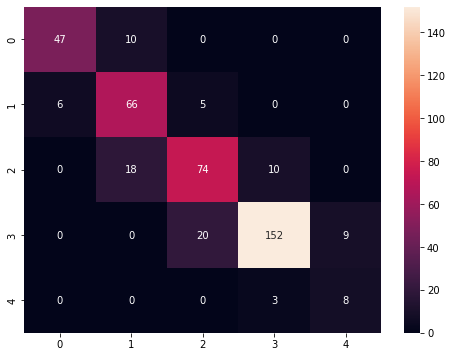

In [23]:
plt.figure(figsize=(8,6))
sb.heatmap(confusion_matrix(y_test, y_pred_nb1), annot=True, fmt='.3g')           # for confusion matrix
nb_acc1 = round(accuracy_score(y_test, y_pred_nb1)*100,3)                         # for accuracy score
nb_pre1 = round(precision_score(y_test, y_pred_nb1, average='weighted')*100,3)    # for precison score
nb_rec1 = round(recall_score(y_test, y_pred_nb1, average='weighted')*100,3)       # for recall score
nb_f11 = round(f1_score(y_test, y_pred_nb1, average='weighted')*100,3)            # for f1 score
print('Accuracy Score :',nb_acc1)
print('Precision Score :',nb_pre1)
print('Recall Score :',nb_rec1)
print('F1 Score :',nb_f11)

## 2. Naive Bayes - With Cross Validation


In [24]:
# importing library 
from sklearn.model_selection import cross_validate

In [25]:
# making model
nb_model2 = GaussianNB()
scoring=['accuracy','precision_weighted','recall_weighted','f1_weighted']

# cross validation
nb_scores2 = cross_validate(nb_model2, x, y, scoring=scoring, cv=rskf, n_jobs=-1, error_score='raise')

In [26]:
nb_acc2 = round(np.mean(nb_scores2['test_accuracy'])*100,3)              # for accuracy score
nb_pre2 = round(np.mean(nb_scores2['test_precision_weighted'])*100,3)    # for precision score
nb_rec2 = round(np.mean(nb_scores2['test_recall_weighted'])*100,3)       # for recall score
nb_f12 = round(np.mean(nb_scores2['test_f1_weighted'])*100,3)            # for f1 score
print('Accuracy Score :', nb_acc2)
print('Precision Score :', nb_pre2)
print('Recall Score:', nb_rec2) 
print('F1 Score :', nb_f12) 

Accuracy Score : 79.464
Precision Score : 81.004
Recall Score: 79.464
F1 Score : 79.891


## 3. Decision Tree Classification - Without Cross Validation

In [27]:
# importing libraries
from sklearn.tree import DecisionTreeClassifier

In [28]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [29]:
dtc_model1 = DecisionTreeClassifier(max_depth=5).fit(x_train, y_train)     # making model and training it 
y_pred_dtc1 = dtc_model1.predict(x_test)                                   # predicting the test values based on the model
print('Predicted Response :',y_pred_dtc1)

Predicted Response : [3 3 2 3 2 2 3 3 1 3 3 3 2 3 3 3 3 3 2 2 2 2 0 3 0 3 2 3 2 1 3 1 1 3 2 0 1
 1 0 3 2 0 2 3 3 1 2 3 1 3 3 2 2 1 2 2 3 0 3 3 3 3 1 3 3 3 2 2 3 1 2 3 3 3
 2 0 3 3 3 3 2 2 0 3 1 3 3 3 3 2 3 0 2 3 3 2 0 1 0 2 3 1 1 3 2 1 3 1 3 1 2
 3 3 1 2 1 3 3 3 3 1 1 2 3 2 3 3 0 2 0 2 3 0 1 0 2 0 3 1 1 3 3 2 0 2 3 2 2
 2 3 3 2 3 3 0 2 2 3 3 3 0 3 3 0 2 2 1 0 0 0 2 2 0 2 3 2 3 2 2 2 3 2 2 1 2
 3 2 3 3 2 3 1 0 3 3 2 0 3 3 2 2 2 3 1 3 3 1 3 2 1 3 3 2 3 2 1 1 3 3 3 2 3
 3 3 3 3 3 0 3 1 3 3 0 2 3 3 3 0 3 0 1 3 3 3 3 2 3 3 3 0 3 1 3 2 1 0 2 2 1
 3 2 3 2 3 2 2 2 3 2 3 1 2 3 1 3 3 3 3 3 1 2 3 2 3 1 3 3 0 2 3 1 1 0 3 3 3
 3 3 1 2 3 3 2 3 1 3 3 2 2 3 3 2 1 2 1 3 3 2 2 0 1 2 3 1 2 1 0 2 3 0 0 2 0
 3 2 3 3 2 0 1 1 2 3 3 2 1 2 3 3 2 1 2 3 2 1 3 3 3 2 0 3 3 1 3 0 1 1 0 1 2
 2 3 3 3 2 3 3 3 3 1 2 1 3 1 3 3 3 2 1 3 3 0 2 3 3 2 3 1 2 3 3 1 1 1 1 3 3
 3 3 2 2 2 0 2 3 3 3 2 3 3 3 2 0 3 2 3 3 3]


Accuracy Score : 80.374
Precision Score : 78.444
Recall Score : 80.374
F1 Score : 79.103


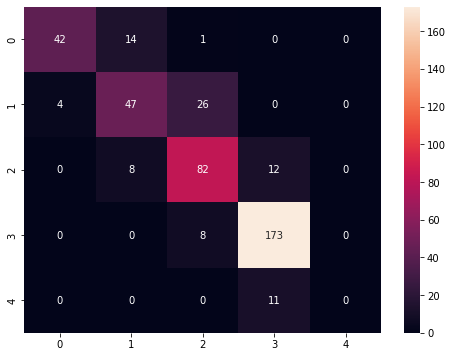

In [30]:
plt.figure(figsize=(8,6))
sb.heatmap(confusion_matrix(y_test, y_pred_dtc1), annot=True, fmt='.3g')            # for confusion matrix
dtc_acc1 = round(accuracy_score(y_test, y_pred_dtc1)*100,3)                         # for accuracy score
dtc_pre1 = round(precision_score(y_test, y_pred_dtc1, average='weighted')*100,3)    # for precision score
dtc_rec1 = round(recall_score(y_test, y_pred_dtc1, average='weighted')*100,3)       # for recall score
dtc_f11 = round(f1_score(y_test, y_pred_dtc1, average='weighted')*100,3)            # for f1 score
print('Accuracy Score :',dtc_acc1)
print('Precision Score :',dtc_pre1)
print('Recall Score :',dtc_rec1)
print('F1 Score :',dtc_f11)

## 4. Decision Tree Classifier - With Cross Validation

In [31]:
# making model
dtc_model2 = DecisionTreeClassifier()
scoring=['accuracy','precision_weighted','recall_weighted','f1_weighted']

# cross validation
dtc_scores2 = cross_validate(dtc_model2, x, y, scoring=scoring, cv=rskf, n_jobs=-1, error_score='raise')

In [32]:
dtc_acc2 = round(np.mean(dtc_scores2['test_accuracy'])*100,3)               # for accuracy score
dtc_pre2 = round(np.mean(dtc_scores2['test_precision_weighted'])*100,3)     # for precision score
dtc_rec2 = round(np.mean(dtc_scores2['test_recall_weighted'])*100,3)        # for recall score
dtc_f12 = round(np.mean(dtc_scores2['test_f1_weighted'])*100,3)             # for f1 score
print('Accuracy Score :', dtc_acc2)
print('Precision Score :', dtc_pre2)
print('Recall Score:', dtc_rec2) 
print('F1 Score :', dtc_f12) 

Accuracy Score : 82.355
Precision Score : 82.549
Recall Score: 82.355
F1 Score : 82.357


## 5. Random Forest Classifier - Without Cross Validation

In [33]:
# importing library
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc_model1 = RandomForestClassifier(max_depth=5).fit(x_train, y_train)     # making and training the model
y_pred_rfc1 = rfc_model1.predict(x_test)                                   # predicting the test values based on the model
print('Predicted response :',y_pred_rfc1)

Predicted response : [3 3 1 3 2 1 3 2 0 3 3 3 2 3 3 3 3 3 2 2 2 2 0 3 0 3 3 3 1 1 3 1 1 3 3 0 1
 2 0 3 2 0 2 3 3 1 2 3 1 3 3 2 2 1 2 3 3 0 3 3 3 3 1 3 3 3 2 2 3 1 2 3 3 3
 2 0 3 2 3 3 1 1 0 3 1 3 3 3 3 2 3 0 2 3 3 1 0 1 0 3 3 1 1 3 1 1 3 1 3 1 2
 3 3 1 2 1 3 3 3 3 1 1 2 3 2 3 3 0 2 0 1 3 0 1 0 2 0 3 1 1 3 3 2 0 2 3 1 2
 2 3 3 2 3 3 0 2 1 3 3 3 0 3 3 0 2 1 1 0 0 0 2 2 0 3 3 1 3 2 2 2 3 2 1 1 1
 3 2 3 3 1 3 1 0 3 3 3 0 3 2 2 1 2 3 1 3 3 1 3 2 2 3 3 2 3 2 1 1 3 3 3 1 3
 3 3 3 3 3 0 3 1 3 3 0 1 3 2 3 0 3 0 1 3 3 3 3 1 3 3 3 0 3 1 3 1 1 0 2 2 1
 3 2 3 2 3 2 2 2 3 1 3 1 2 3 1 3 3 3 3 3 1 2 3 2 3 0 3 3 0 2 3 1 1 0 3 3 3
 3 3 0 1 3 3 3 3 1 3 3 2 2 3 3 2 1 2 1 3 3 2 1 0 1 2 3 1 2 1 0 2 3 0 0 2 0
 3 2 3 3 2 0 1 1 2 3 3 2 1 2 3 3 1 1 3 3 2 2 3 3 3 1 0 3 3 1 3 0 1 1 0 2 2
 3 3 3 3 3 3 3 3 3 1 2 2 3 1 3 3 3 2 1 3 3 0 2 2 3 2 3 1 2 3 3 1 1 1 1 3 3
 3 3 2 2 2 0 2 3 3 3 2 3 3 3 2 0 3 2 3 3 3]


Accuracy Score : 86.682
Precision Score : 84.728
Recall Score : 86.682
F1 Score : 85.434


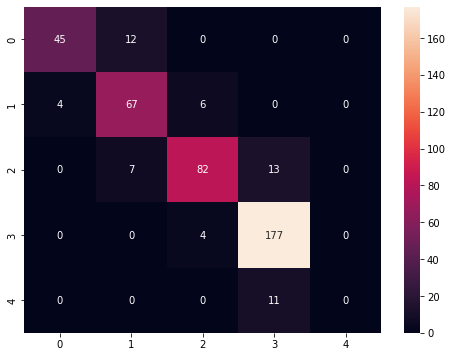

In [35]:
plt.figure(figsize=(8,6))
sb.heatmap(confusion_matrix(y_test, y_pred_rfc1), annot=True, fmt='.3g')            # for confusion matrix
rfc_acc1 = round(accuracy_score(y_test, y_pred_rfc1)*100,3)                         # for accuracy score
rfc_pre1 = round(precision_score(y_test, y_pred_rfc1, average='weighted')*100,3)    # for precision score
rfc_rec1 = round(recall_score(y_test, y_pred_rfc1, average='weighted')*100,3)       # for recall score
rfc_f11 = round(f1_score(y_test, y_pred_rfc1, average='weighted')*100,3)            # for f1 score
print('Accuracy Score :',rfc_acc1)
print('Precision Score :',rfc_pre1)
print('Recall Score :',rfc_rec1)
print('F1 Score :',rfc_f11)

## 6. Random Forest Classifier - With Cross Validation

In [36]:
rfc_model2 = RandomForestClassifier()
scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted']

rfc_scores2 = cross_validate(rfc_model2, x,y, cv=rskf, n_jobs=-1, scoring=scoring, error_score='raise')

In [37]:
rfc_acc2 = round(np.mean(rfc_scores2['test_accuracy'])*100,3)               # for accuracy score
rfc_pre2 = round(np.mean(rfc_scores2['test_precision_weighted'])*100,3)     # for precision score
rfc_rec2 = round(np.mean(rfc_scores2['test_recall_weighted'])*100,3)        # for recall score
rfc_f12 = round(np.mean(rfc_scores2['test_f1_weighted'])*100,3)             # for f1 score
print('Accuracy Score :', rfc_acc2)
print('Precision Score :', rfc_pre2)
print('Recall Score:', rfc_rec2) 
print('F1 Score :', rfc_f12)

Accuracy Score : 87.692
Precision Score : 87.404
Recall Score: 87.692
F1 Score : 87.387


## 7. Stacking Classifier - Without Cross Validation


In [38]:
# importing library 
from sklearn.ensemble import StackingClassifier           # for stacking classifier algorithm
from sklearn.neighbors import KNeighborsClassifier        # for KN Classifier algorithm
from sklearn.tree import DecisionTreeClassifier           # for DT Classifier algorithm
from sklearn.svm import SVC                               # for SVC algorthm
from sklearn.naive_bayes import GaussianNB                # for NB algorithm
from sklearn.linear_model import LogisticRegression       # for Logistic Regression algorithm

In [39]:
# making user defined function
def stacking():
    level0=list()
    level0.append(('KN', KNeighborsClassifier()))
    level0.append(('DT', DecisionTreeClassifier()))
    level0.append(('SVC', SVC()))
    level0.append(('NB', GaussianNB()))

    level1 = LogisticRegression()
    s_scores = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return s_scores

In [40]:
# importing Library 
from sklearn.model_selection import cross_validate
new_model = stacking()
scoring=['accuracy','precision_weighted','recall_weighted','f1_weighted']

# cross validation
stack_scores = cross_validate(new_model, x,y, scoring=scoring, cv=rskf, n_jobs=-1, error_score='raise')

In [41]:
stack_acc = round(np.mean(stack_scores['test_accuracy'])*100,3)                # for accuracy score
stack_pre = round(np.mean(stack_scores['test_precision_weighted'])*100,3)      # for precision score
stack_rec = round(np.mean(stack_scores['test_recall_weighted'])*100,3)         # for recall score
stack_f1 = round(np.mean(stack_scores['test_f1_weighted'])*100,3)              # for f1 score
print('Accuracy Score :', stack_acc)
print('Precision Score :', stack_pre)
print('Recall Score:', stack_rec) 
print('F1 Score :', stack_f1)

Accuracy Score : 88.742
Precision Score : 88.596
Recall Score: 88.742
F1 Score : 88.451


### <center><div class="alert alert-info">COMPARISION</div>

In [42]:
compare = pd.DataFrame({'Accuracy Score':[nb_acc1,nb_acc2,dtc_acc1,dtc_acc2,rfc_acc1,rfc_acc2,stack_acc],
                        'Precision Score':[nb_pre1,nb_pre2,dtc_pre1,dtc_pre2,rfc_pre1,rfc_pre2,stack_pre],
                        'Recall Score':[nb_rec1,nb_rec2,dtc_rec1,dtc_rec2,rfc_rec1,rfc_rec2,stack_rec],
                        'F1 Score':[nb_f11,nb_f12,dtc_f11,dtc_f12,rfc_f11,rfc_f12,stack_f1]},                       
                      index=['Naive Bayes without CV','Naive Bayes with CV','Decision Tree without CV',
                             'Decision Tree with CV','Random Forest without CV','Random Forest with CV',
                            'Stack with CV'])
compare

,Accuracy Score,Precision Score,Recall Score,F1 Score
Naive Bayes without CV,81.075,82.423,81.075,81.441
Naive Bayes with CV,79.464,81.004,79.464,79.891
Decision Tree without CV,80.374,78.444,80.374,79.103
Decision Tree with CV,82.355,82.549,82.355,82.357
Random Forest without CV,86.682,84.728,86.682,85.434
Random Forest with CV,87.692,87.404,87.692,87.387
Stack with CV,88.742,88.596,88.742,88.451


### Choosing Best model Stack with CV

In [43]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(new_model,x,y,cv=5)
y_pred

array([3, 3, 2, ..., 3, 1, 2])

In [44]:
df['Nbedrooms'].value_counts()

4    623
5    600
6    573
3    410
7    393
8    226
2    175
Name: Nbedrooms, dtype: int64

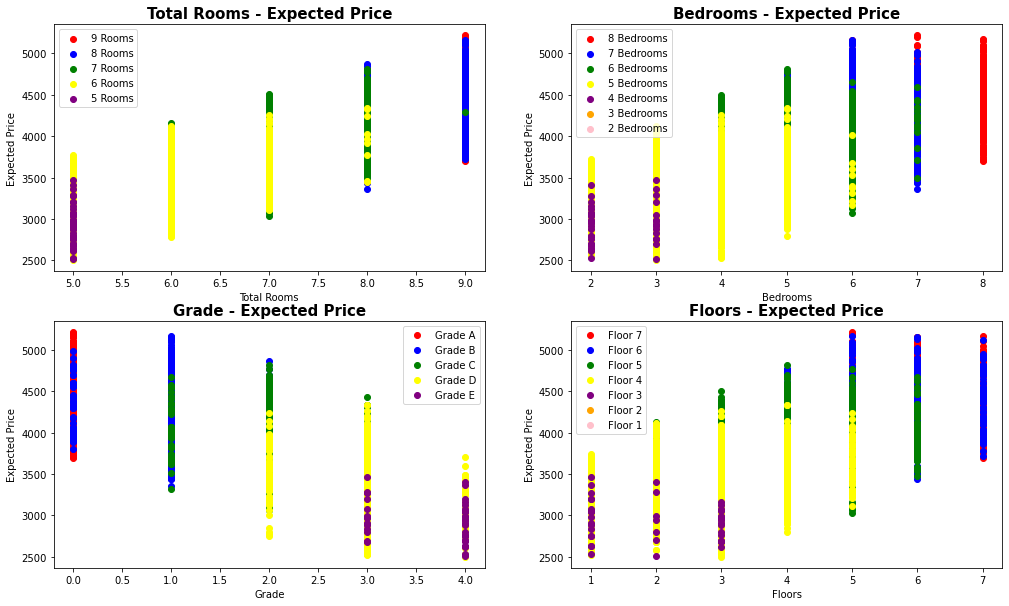

In [45]:
plt.subplots(2,2, figsize=(17,10))

plt.subplot(221)
X = df.iloc[:,[2,12]].values
plt.title('Total Rooms - Expected Price', size=15, fontweight='bold')
plt.xlabel('Total Rooms')
plt.ylabel('Expected Price')
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], color='red', label='9 Rooms')
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], color='blue', label='8 Rooms')
plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1], color='green', label='7 Rooms')
plt.scatter(X[y_pred==3, 0], X[y_pred==3, 1], color='yellow', label='6 Rooms')
plt.scatter(X[y_pred==4, 0], X[y_pred==4, 1], color='purple', label='5 Rooms')
plt.legend()

plt.subplot(222)
X = df.iloc[:,[3,12]].values
plt.title('Bedrooms - Expected Price', size=15, fontweight='bold')
plt.xlabel('Bedrooms')
plt.ylabel('Expected Price')
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], color='red', label='8 Bedrooms')
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], color='blue', label='7 Bedrooms')
plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1], color='green', label='6 Bedrooms')
plt.scatter(X[y_pred==3, 0], X[y_pred==3, 1], color='yellow', label='5 Bedrooms')
plt.scatter(X[y_pred==4, 0], X[y_pred==4, 1], color='purple', label='4 Bedrooms')
plt.scatter(X[y_pred==5, 0], X[y_pred==5, 1], color='orange', label='3 Bedrooms')
plt.scatter(X[y_pred==6, 0], X[y_pred==6, 1], color='pink', label='2 Bedrooms')
plt.legend()

plt.subplot(223)
X = df.iloc[:,[13,12]].values
plt.title('Grade - Expected Price', size=15, fontweight='bold')
plt.xlabel('Grade')
plt.ylabel('Expected Price')
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], color='red', label='Grade A')
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], color='blue', label='Grade B')
plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1], color='green', label='Grade C')
plt.scatter(X[y_pred==3, 0], X[y_pred==3, 1], color='yellow', label='Grade D')
plt.scatter(X[y_pred==4, 0], X[y_pred==4, 1], color='purple', label='Grade E')
plt.legend()

plt.subplot(224)
X = df.iloc[:,[9,12]].values
plt.title('Floors - Expected Price', size=15, fontweight='bold')
plt.xlabel('Floors')
plt.ylabel('Expected Price')
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], color='red', label='Floor 7')
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], color='blue', label='Floor 6')
plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1], color='green', label='Floor 5')
plt.scatter(X[y_pred==3, 0], X[y_pred==3, 1], color='yellow', label='Floor 4')
plt.scatter(X[y_pred==4, 0], X[y_pred==4, 1], color='purple', label='Floor 3')
plt.scatter(X[y_pred==5, 0], X[y_pred==5, 1], color='orange', label='Floor 2')
plt.scatter(X[y_pred==6, 0], X[y_pred==6, 1], color='pink', label='Floor 1')
plt.legend()
plt.show()

### <div class="alert alert-success">Interpretation</div>
     - In Total Rooms and Expected Price, we can see that Most of the 9 Rooms have higher price which is going 3500 to more than 5000 and least for 6 and 5 rooms starting from 2500 to 3800.  
     - In bedrooms Prices graph, 8 and 7 bedrooms have highest expected price from 3600 to more than 5000 and least for 2,3 and 4 berooms. Most of the bedroom counts are of 4, 5, and 6.
     - In Grade and Expected price graph, Grade A have highest Expected price from 3600 to more than 5000 and Grade D and E have price range from 2500 to 4500. Most of the count is of Grade C and D.
     - In Floors and Expected Price graph, 6 and 7 Floor building have highest price and least for 1,2,3 and 4 floor building. Most of the building have floors of 3,4 and 5.

### <center><div class="alert alert-info">CONCLUSION</div>
* There were 4 models prepared for getting the best performance and prediction, Naive Bayes, Decision Tree Classifier, Random Forest Classifier and Stacking Classifier.
* On the basis of graph and the table we obtained, Stack Classifier with Cross Validation can be said as best model among other models.
    - As the Recall Score and F1 Score both are comparitively good than other models 


### <center><div class="alert alert-info">BUSINESS IMPLICATIONS</div>
- There are 51.43% of houses which have roof and 48.57% dont have roof of their house.
- In D grade 42.33% have maximum percentage of share in houses and E have the least 2.53%, so getting a D grade house is easier.
- Most of the building are of 3 Floors having count upto 250 and least for 1 and 7 floors where the counts is ~80.
- Most of the Roof area is 90 in the 51.43% of roof houses..
- Buyer can get a house easily in most expected price of 3500-4000 with area 295-355.
- In 5 and 6 rooms, Grade D have the highest count, in 7 rooms Grade C have more counts, in 8 rooms Grade B have higher counts than others and in 9 rooms Grade A have higher counts than any other grade.
- In Grade and Expected price graph, Grade A have highest Expected price from 3600 to more than 5000 and Grade D and E have price range from 2500 to 4500. Most of the count is of Grade C and D.
- In Floors and Expected Price graph, 6 and 7 Floor building have highest price and least for 1,2,3 and 4 floor building. Most of the building have floors of 3,4 and 5.
### *So, On the basis of above business implication buyer can decide the way he/she wants to buy the house.*
